In [108]:
#importing our libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
!python -m pip install --user --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
# our function for wrangling our data 
def wrangle(df):
  df=pd.read_csv('/content/drive/MyDrive/EDA/hc.csv')
  # split the target and extract only the number
  df['Category_target']= (df['Category'].str.split("=",expand=True)[0]
  .str.replace("s","")).astype(int)
  #drop old target
  df.drop(columns='Category',inplace=True)
  # droped because of multicollinearity
  df.drop(columns=["PROT","ALP","GGT","Unnamed: 0"],inplace=True)


  return df

In [71]:
#df=pd.read_csv('/content/drive/MyDrive/EDA/hc.csv')
df= wrangle(df)
df.head()

,Age,Sex,ALB,ALT,AST,BIL,CHE,CHOL,CREA,Category_target
0,32,m,38.5,7.7,22.1,7.5,6.93,3.23,106.0,0
1,32,m,38.5,18.0,24.7,3.9,11.17,4.80,74.0,0
2,32,m,46.9,36.2,52.6,6.1,8.84,5.20,86.0,0
3,32,m,43.2,30.6,22.6,18.9,7.33,4.74,80.0,0
4,32,m,39.2,32.6,24.8,9.6,9.15,4.32,76.0,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              615 non-null    int64  
 1   Sex              615 non-null    object 
 2   ALB              614 non-null    float64
 3   ALT              614 non-null    float64
 4   AST              615 non-null    float64
 5   BIL              615 non-null    float64
 6   CHE              615 non-null    float64
 7   CHOL             605 non-null    float64
 8   CREA             615 non-null    float64
 9   Category_target  615 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 48.2+ KB


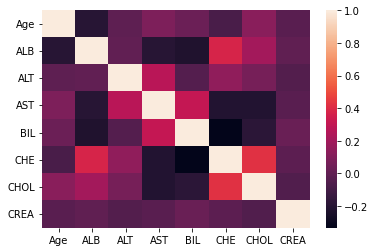

In [93]:
#check if thair is any multicollinear columns  except the target
correlation =df.select_dtypes("number").drop(columns='Category_target').corr()
sns.heatmap(correlation)

In [94]:
#now after seeing heatmap which columns to drop that are flaged multicolliniar?
df['CHE'].corr(df['ALB'])

0.3758783910178603

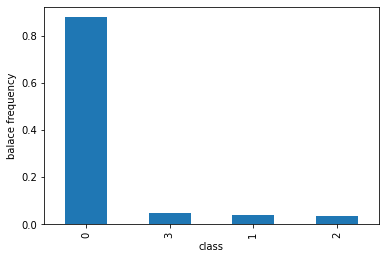

In [61]:
# just to see which class is highest probablity 
df["Category_target"].value_counts(normalize=True).plot(
kind ='bar',xlabel='class',ylabel='balace frequency')

In [106]:
#filing our missing values using "forward fill"
df.fillna(method='ffill',inplace=True)

In [73]:
#split our data into feature and target commonly known as vertical split
xfeatures=df.drop(columns=["Category_target"])
yfeature=df["Category_target"]


In [74]:
#spliting our data set in to train and test set comonly known as horizontal split
x_train,x_test,y_train,y_test=train_test_split(xfeatures,yfeature,test_size=0.2)

In [95]:
#baseline model & and its accuracy
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.87


In [104]:
# instanciating model arch using sklearns "make_piplines"
make_pipline_model = make_pipeline(
OneHotEncoder(handle_unknown='ignore'), LogisticRegression(max_iter=1000))

In [105]:
#fitting our model on training data(x_train,y_train)
make_pipline_model.fit(x_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [99]:
# our one hot encodeed values of our target
make_pipline_model.classes_

array([0, 1, 2, 3])

In [78]:
#prediction on traing data
acc_train = accuracy_score(y_train,make_pipline_model.predict(x_train))
acc_train

1.0

In [79]:
#prediction on the test data
make_pipline_model.score(x_test,y_test)

0.9024390243902439

In [85]:
#the prbablity of each class
make_pipline_model.predict_proba(x_train)[:5]

array([[0.96788495, 0.00961781, 0.01017295, 0.01232429],
       [0.98600373, 0.00445605, 0.00343481, 0.00610541],
       [0.92025247, 0.04289982, 0.01895873, 0.01788898],
       [0.96260884, 0.01684817, 0.0119014 , 0.00864159],
       [0.97575908, 0.00497354, 0.00730283, 0.01196456]])

In [80]:
features = make_pipline_model.named_steps["onehotencoder"].get_feature_names()
importances =make_pipline_model.named_steps["logisticregression"].coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [81]:
odds_ratios = pd.Series(np.exp(importances),index=features).sort_values()
odds_ratios.head()

x5_13.0    0.351085
x2_39.0    0.369792
x2_41.0    0.470596
x2_37.0    0.480716
x5_9.0     0.484488
dtype: float64

Text(0.5, 0, 'odds ratio')

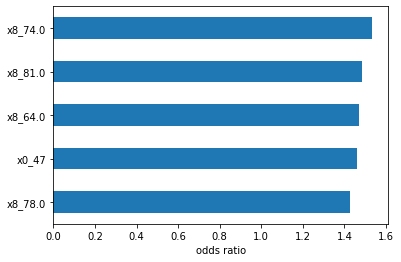

In [82]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind='barh')
plt.xlabel('odds ratio')

Text(0.5, 0, 'odds ratio')

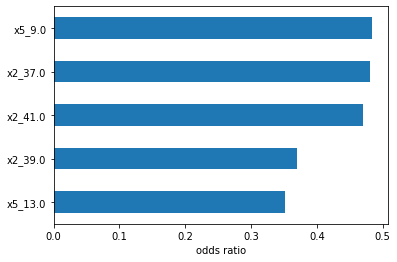

In [83]:
# Horizontal bar chart, five smallest coefficients
odds_ratios.head().plot(kind='barh')
plt.xlabel('odds ratio')